In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)


In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

In [25]:
data=pd.read_csv('c:\\Users\\kanha\\Downloads\\insurance_data.csv')

In [4]:
data.head(5)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.shape

(1000, 40)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
data=data.drop(columns=['_c39'])

In [9]:
data.replace('?',np.nan,inplace=True)

In [10]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [11]:
# Fill missing values with mode for categorical columns
for column in ['police_report_available', 'property_damage', 'collision_type', 'authorities_contacted']:
    data[column] = data[column].fillna(data[column].mode()[0])


In [12]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [13]:
# Encoding categorical variables
le = LabelEncoder()
categorical_columns = [
    'insured_sex', 'insured_relationship', 'policy_state', 'insured_education_level', 'insured_occupation',
    'insured_hobbies', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state',
    'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make',
    'auto_model', 'fraud_reported'
]
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [14]:
data.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,Single Vehicle Collision,2,0,3,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,Vehicle Theft,1,1,3,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,Multi-vehicle Collision,1,1,3,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0


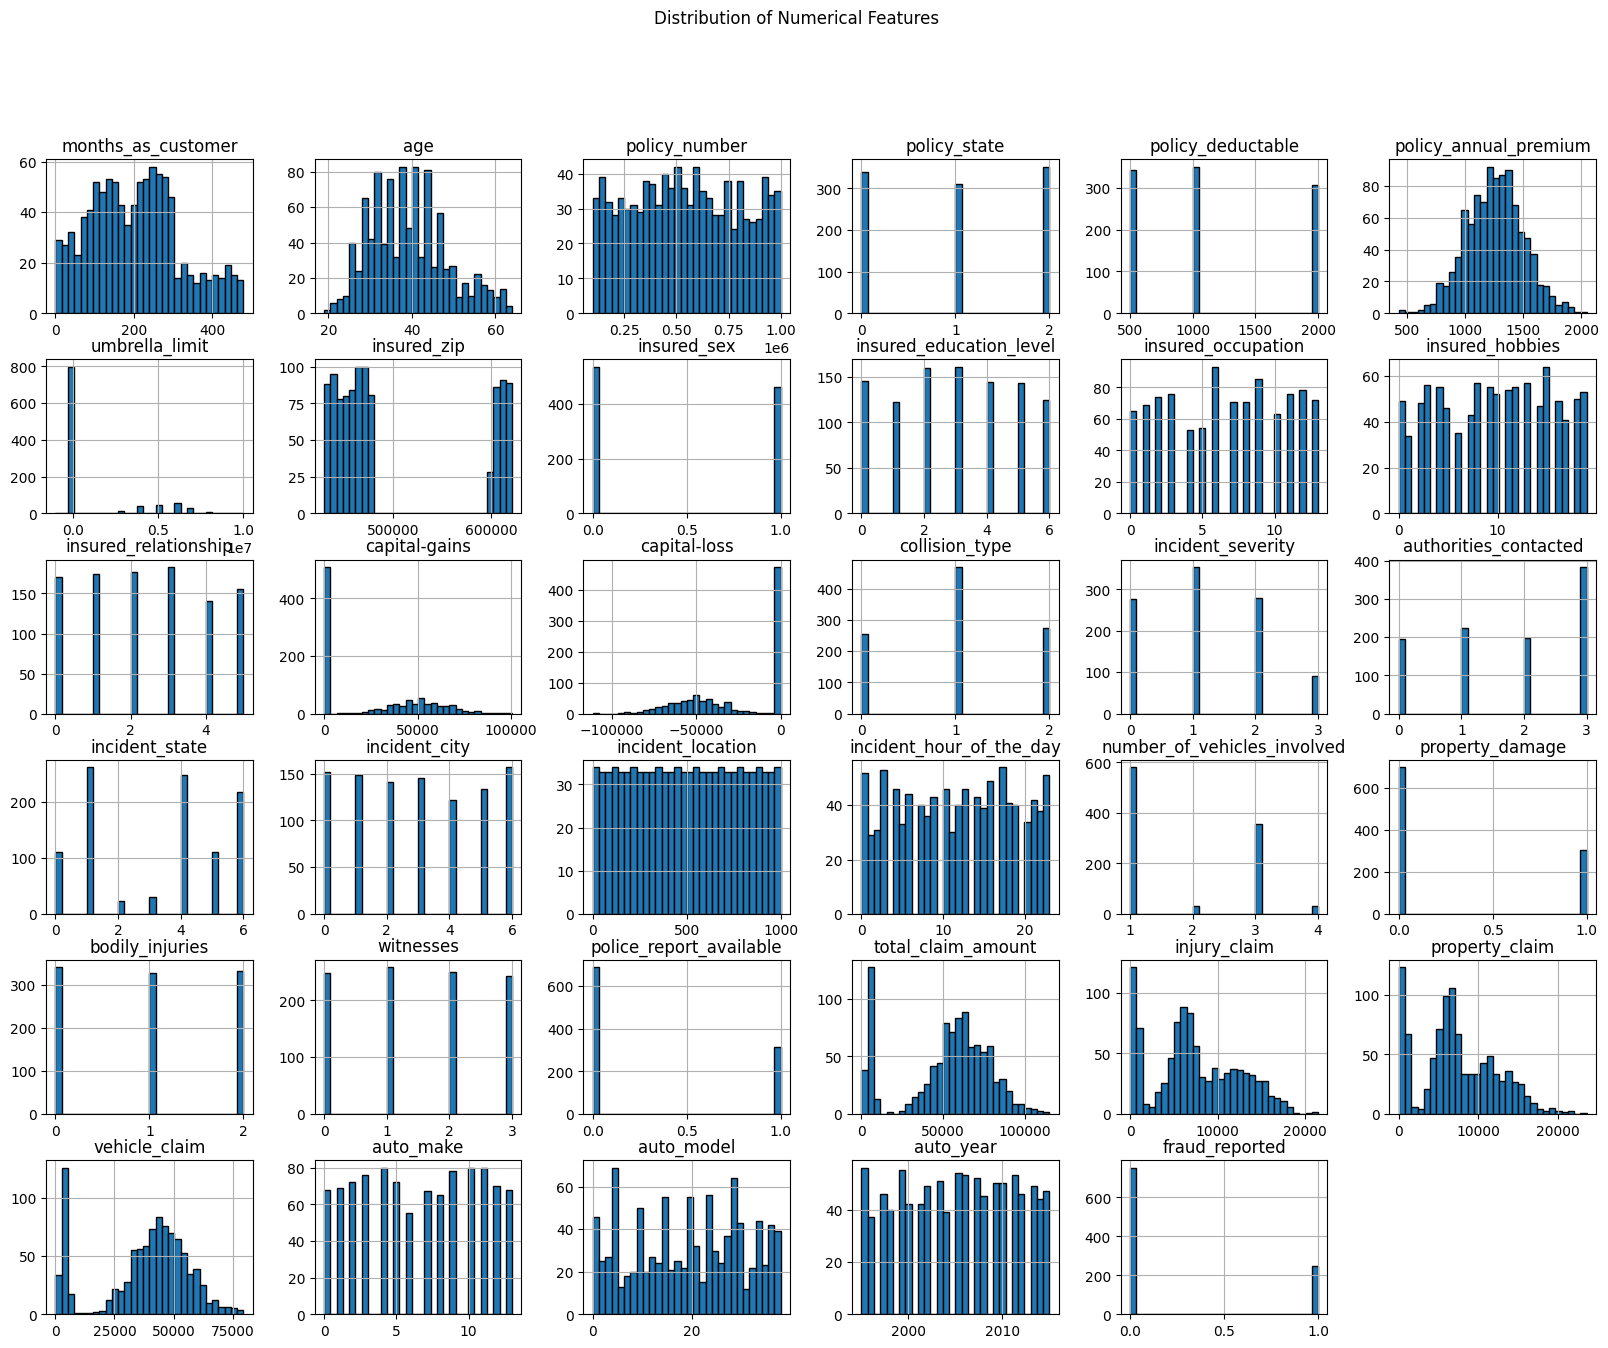

In [15]:

# Visualizing the distribution of numerical features
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_columns].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()


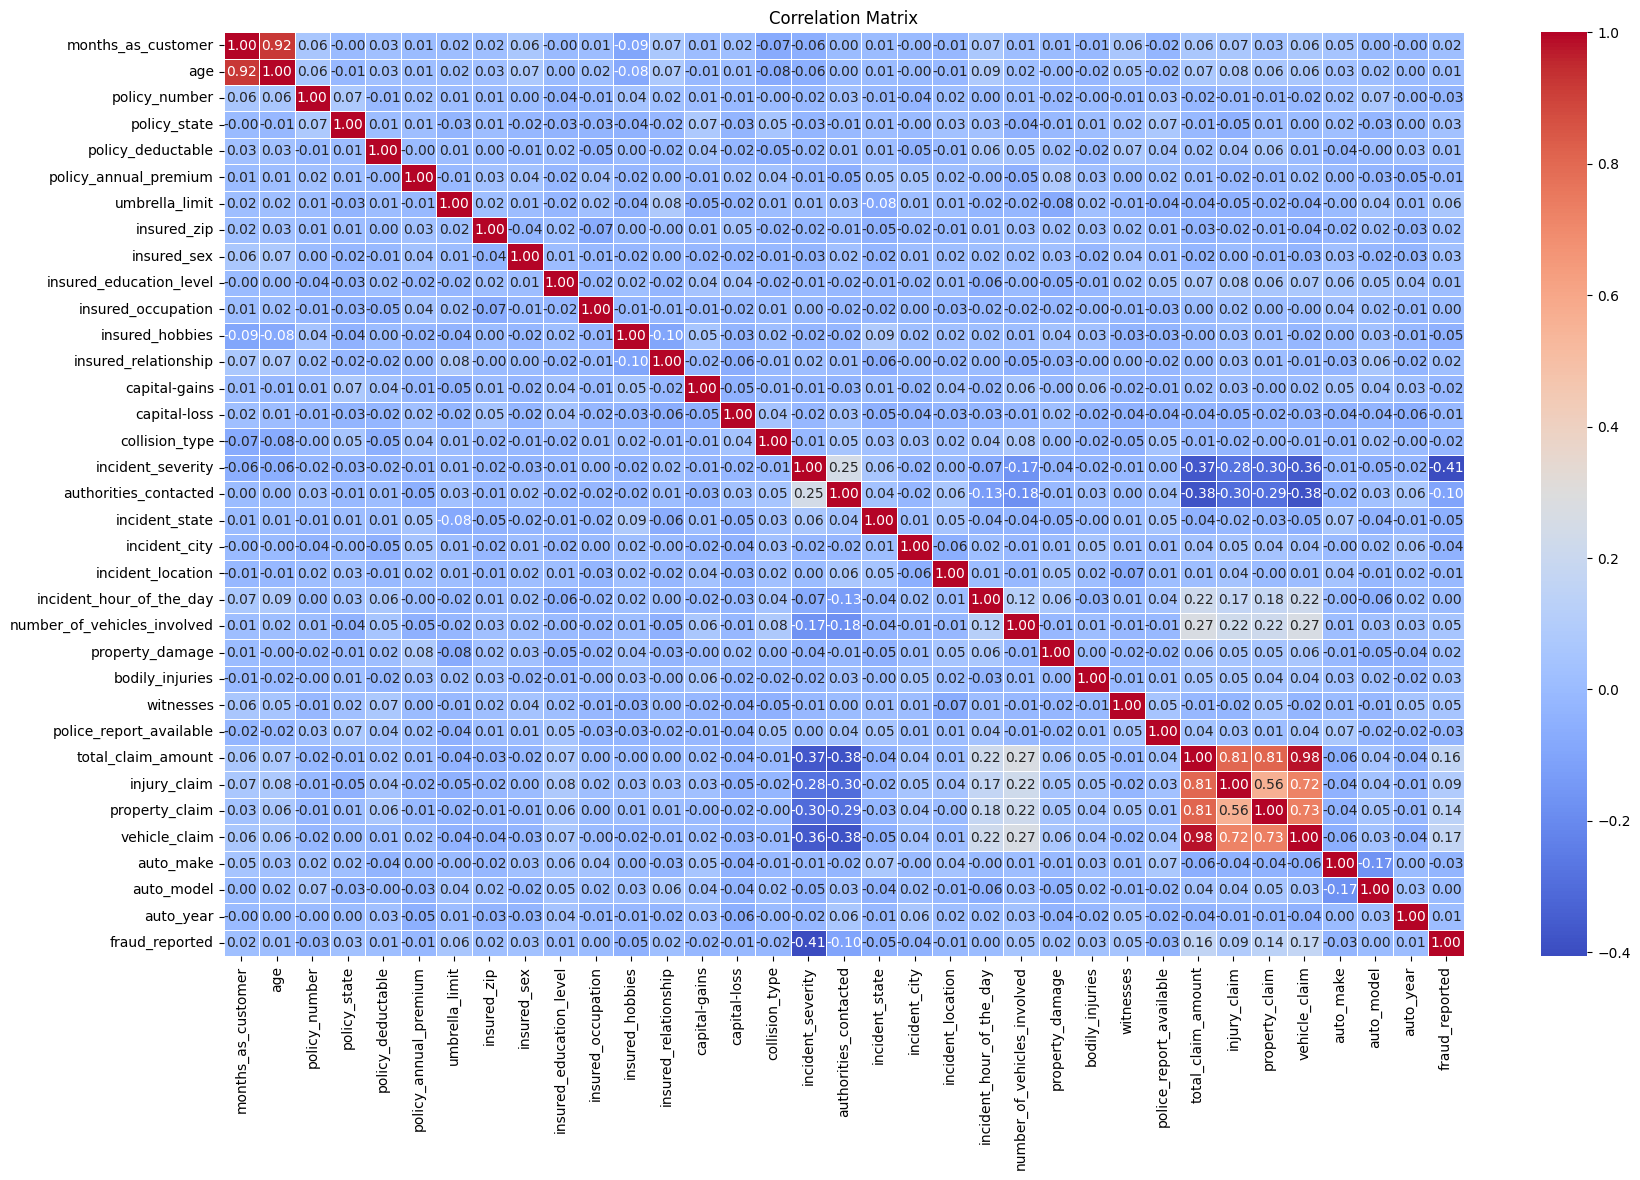

In [16]:
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_data.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


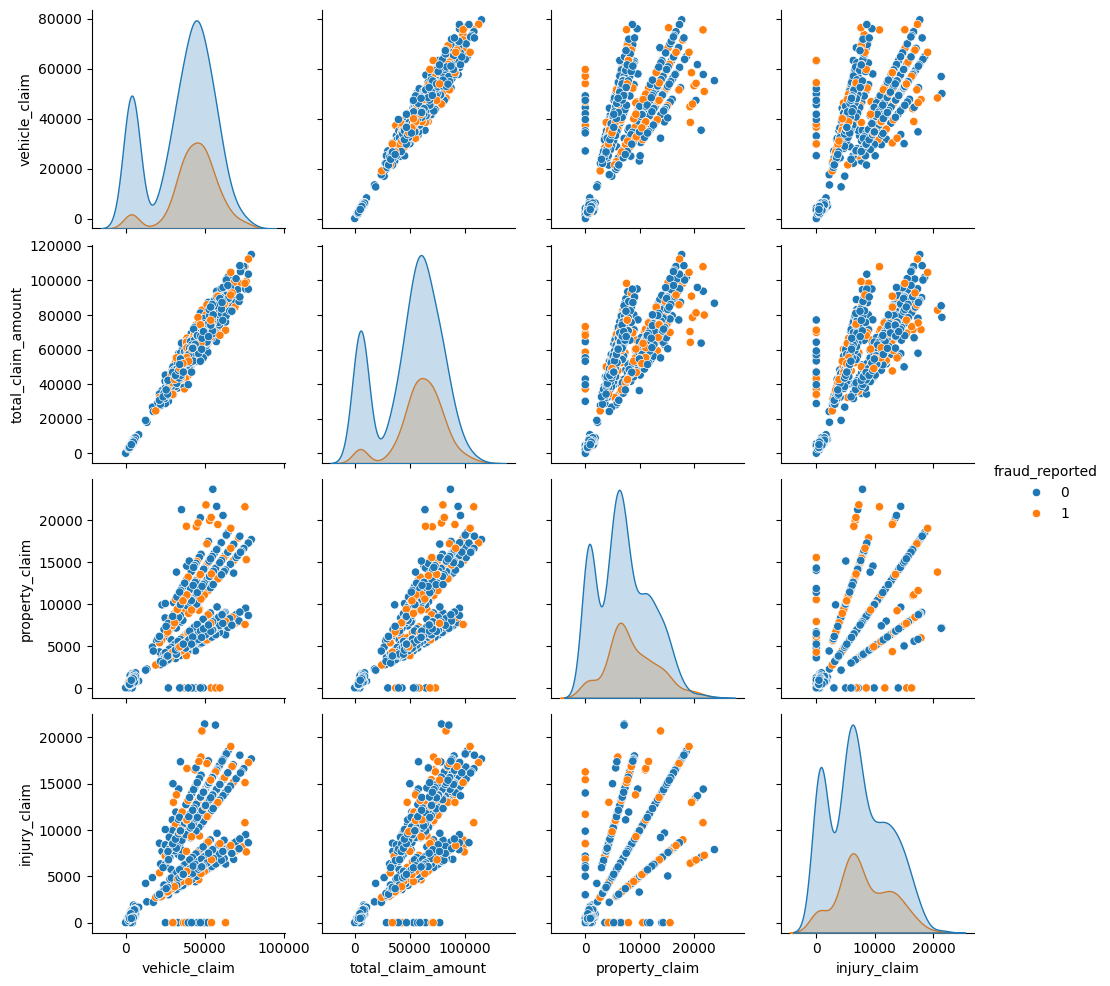

In [17]:
# Pairplot for selected features
selected_features = ['vehicle_claim', 'total_claim_amount', 'property_claim', 'injury_claim', 'fraud_reported']
sns.pairplot(data[selected_features], hue='fraud_reported')
plt.show()


In [18]:
# Feature and Target Selection
feat = ['vehicle_claim', 'total_claim_amount', 'property_claim', 'injury_claim', 'umbrella_limit',
        'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'policy_state',
        'insured_relationship', 'months_as_customer']
X = data[feat]
y = data.fraud_reported


In [19]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Handle Imbalanced Data
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)


In [21]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
#build neural network model using tesnorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [23]:
from scikeras.wrappers import KerasClassifier

# Define the function to create the model with parameters
def create_model(optimizer='adam', activation='relu', dropout_rate=0.5):
    model = Sequential([
        Dense(64, input_dim=len(feat), activation=activation),
        Dropout(dropout_rate),
        Dense(32, activation=activation),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Update KerasClassifier with parameters via build_fn
model = KerasClassifier(
    model=create_model,
    verbose=0
)

# Define the parameter grid
param_grid = {
    'batch_size': [10, 20, 30],
    'epochs': [50, 100],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh'],
    'model__dropout_rate': [0.3, 0.5, 0.7]
}

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print best parameters
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate the model
best_model = grid_result.best_estimator_
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best: 0.7036925673893548 using {'batch_size': 10, 'epochs': 100, 'model__activation': 'relu', 'model__dropout_rate': 0.3, 'model__optimizer': 'adam'}
Accuracy: 0.6033333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       220
           1       0.24      0.23      0.23        80

    accuracy                           0.60       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.60      0.60      0.60       300

Confusion Matrix:
 [[163  57]
 [ 62  18]]


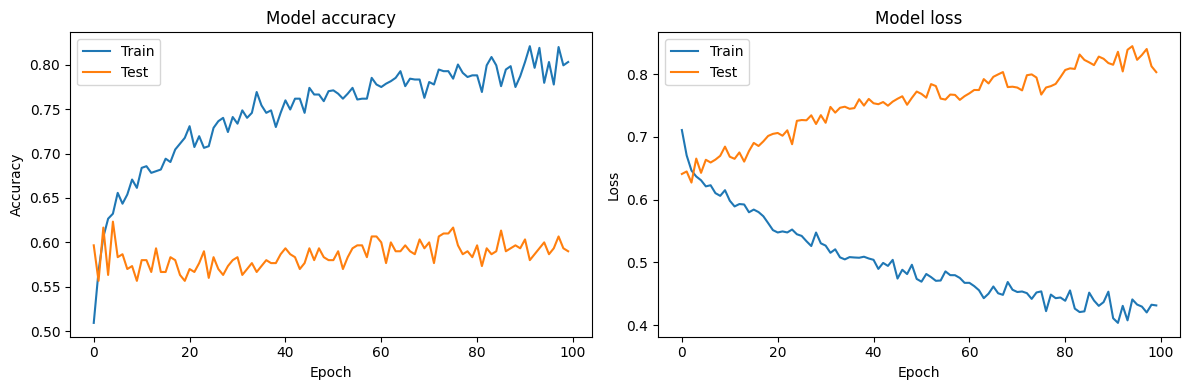

In [27]:
# Fit the best model again to capture history
best_params = grid_result.best_params_

# Extract the best parameters
batch_size = best_params['batch_size']
epochs = best_params['epochs']
optimizer = best_params['model__optimizer']
activation = best_params['model__activation']
dropout_rate = best_params['model__dropout_rate']

# Create a new model with the best parameters
model = create_model(optimizer=optimizer, activation=activation, dropout_rate=dropout_rate)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=0)

# Use the history object to plot training and validation metrics
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


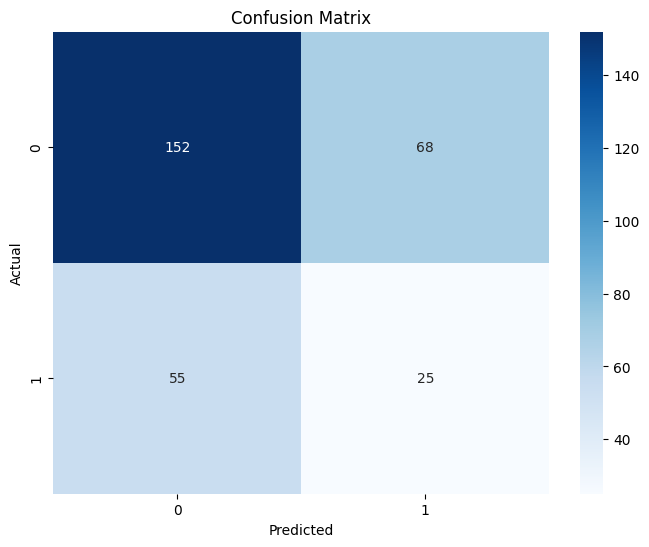

In [28]:
#visualize confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


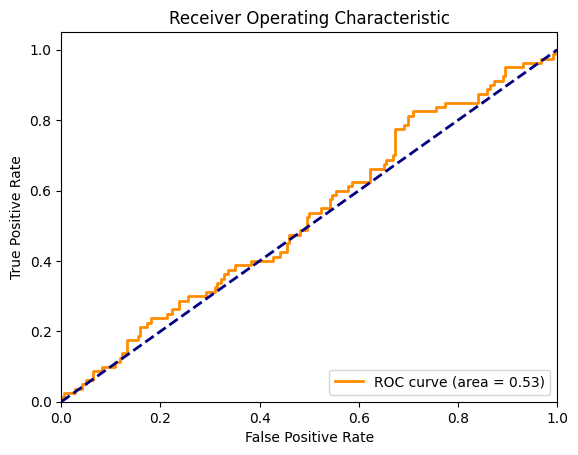

In [30]:
from sklearn.metrics import roc_curve, auc

# Compute probabilities
y_proba = model.predict(X_test).ravel()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()